## Model training and testing

In [1]:
import joblib
import matplotlib.pyplot as plt
import sklearn
import numpy as np

from generate_data import train_model
from generate_data import load_data

In [2]:
# Train on generated data
set_name = 'training_set_10000'
train_model(set_name)

estimator = joblib.load('estimator.pkl')


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...


[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    2.1s remaining:    4.9s


Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...


[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    2.7s remaining:    1.2s


Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...


[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    3.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s


Training: R2 = 0.7062707146763216, MAE = 1.1908677179820159e-05
Test: R2 = -57.663033009655706, MAE = 3.070186837189964e-05


[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


In [3]:
estimator = joblib.load('estimator.pkl')

In [8]:
input_data, output_data = load_data('training_set')

In [9]:
print(input_data.shape)

(6, 3347)


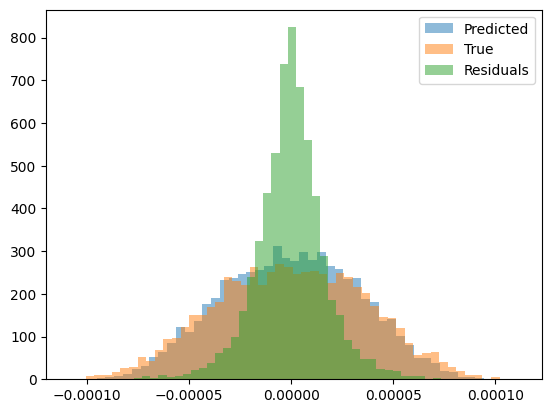

In [18]:
predicted_errors = np.hstack(estimator.predict(input_data))
true_errors = np.hstack(output_data)

#Example histogram for the errors for a single simulation.

plt.hist(predicted_errors, alpha = 0.5, bins=50, label="Predicted")
plt.hist(true_errors, alpha = 0.5, bins=50, label="True")
plt.hist(predicted_errors-true_errors, alpha=0.5, bins=50, label="Residuals")
plt.legend()
plt.show()

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.2s finished


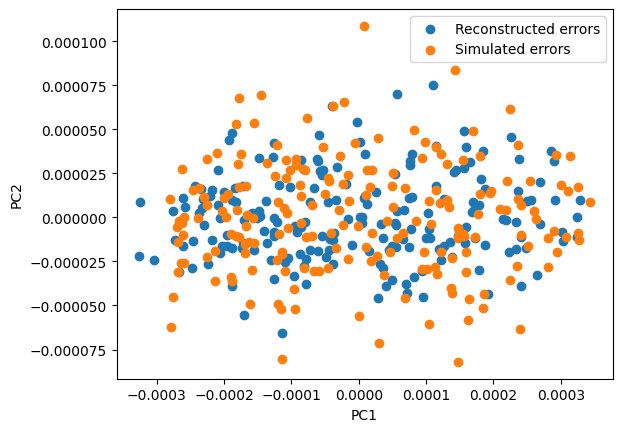

In [19]:
#PCA visualization of the simulated magnet errors and reconstruction, 
# for an unbiased regression a similar distribution is expected, for an 
# accurate regression the spread should be similar 

pca = sklearn.decomposition.PCA(n_components=2)

predicted_data = estimator.predict(input_data)

pca.fit(output_data) # Fitting PCA decomposition to extract the most important components of the simulation data

pred_red_data = pca.transform(predicted_data)
output_red_data = pca.transform(output_data)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(pred_red_data[:,0], pred_red_data[:,1], label="Reconstructed errors")
plt.scatter(output_red_data[:,0], output_red_data[:,1], label="Simulated errors")
plt.legend()